In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df=pd.read_csv('bit.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [3]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date

In [4]:
Daily_Price = df.groupby('Date')['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.472579
2012-01-01    4.680778
2012-01-02    5.000000
2012-01-03    5.145917
2012-01-04    5.195443
Name: Weighted_Price, dtype: float64

In [5]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns=['Close'])
new_df.head()

,Close
Date,
2011-12-31,4.472579
2012-01-01,4.680778
2012-01-02,5.000000
2012-01-03,5.145917
2012-01-04,5.195443


In [6]:
df=new_df


df['Prediction'] = df[['Close']].shift(-30)

df.head()

,Close,Prediction
Date,,
2011-12-31,4.472579,5.505306
2012-01-01,4.680778,5.603342
2012-01-02,5.000000,5.562427
2012-01-03,5.145917,6.100355
2012-01-04,5.195443,6.200014


In [7]:
df.dropna(inplace=True)

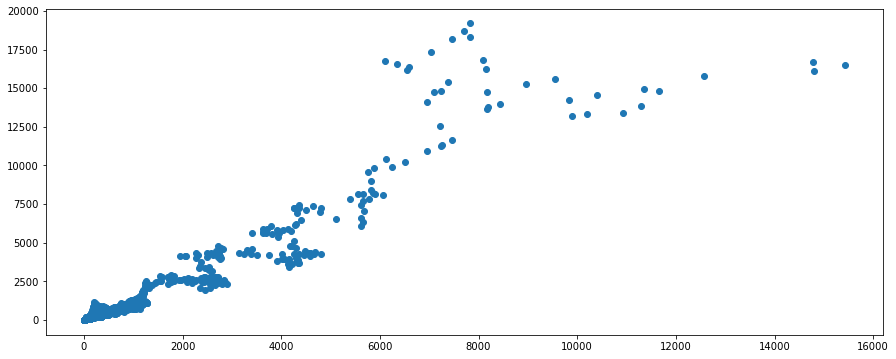

In [8]:
plt.scatter(df.Close,df.Prediction)

In [9]:
df['zscore']=(df.Prediction-df.Prediction.mean())/df.Prediction.std()

In [10]:
df.head()

,Close,Prediction,zscore
Date,,,
2011-12-31,4.472579,5.505306,-0.426149
2012-01-01,4.680778,5.603342,-0.426106
2012-01-02,5.000000,5.562427,-0.426124
2012-01-03,5.145917,6.100355,-0.425890
2012-01-04,5.195443,6.200014,-0.425846


In [11]:
df2=df[(df.zscore>-3) & (df.zscore<3)]
df2.head()

,Close,Prediction,zscore
Date,,,
2011-12-31,4.472579,5.505306,-0.426149
2012-01-01,4.680778,5.603342,-0.426106
2012-01-02,5.000000,5.562427,-0.426124
2012-01-03,5.145917,6.100355,-0.425890
2012-01-04,5.195443,6.200014,-0.425846


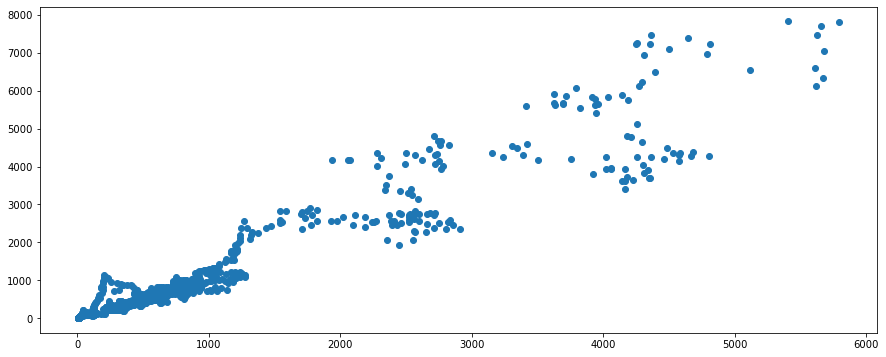

In [12]:
plt.scatter(df2.Close,df2.Prediction)

In [13]:
X=df2.drop('Prediction', axis=1)
y=df2['Prediction']
y

Date
2011-12-31       5.505306
2012-01-01       5.603342
2012-01-02       5.562427
2012-01-03       6.100355
2012-01-04       6.200014
                 ...     
2017-10-16    7045.891271
2017-10-17    7459.011402
2017-10-18    7826.669954
2017-10-19    7696.528960
2017-10-20    7825.420316
Name: Prediction, Length: 2118, dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)
X

array([[-0.65992025, -0.59540863],
       [-0.65968614, -0.59532278],
       [-0.65932719, -0.59535861],
       ...,
       [ 5.40915476,  6.25332083],
       [ 5.69255643,  6.13936076],
       [ 5.84381538,  6.25222656]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)


In [17]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101,criterion='mse')
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.999927970743771

In [18]:
y_pp=reg.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pp)
rmse=np.sqrt(mse)
rmse

9.531247602761535

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(criterion="mae",min_samples_leaf=10)
dt1.fit(X_train,y_train)
dt1.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


0.9971653809705844

In [21]:
y_py=dt1.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_py)
rmse=np.sqrt(mse)
rmse

59.79193877534981

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',min_samples_leaf=33)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.9771685177826789

In [24]:
yuu=dt.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,yuu)
rmse=np.sqrt(mse)
rmse

169.69237967651165

In [26]:
from sklearn.linear_model import LinearRegression
dd=LinearRegression(fit_intercept=True)
dd.fit(X_train,y_train)
dd.score(X_test,y_test)*100

100.0

In [27]:
yppp=dd.predict(X_test)
yppp[:10]

array([ 231.46601279,    4.64540278,  697.81760787,  631.02172199,
        584.75524835,  262.53305275,  617.22538706,    4.65097097,
       3940.884909  ,  375.75196403])

In [28]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,yppp)
rmse=np.sqrt(mse)
rmse

3.026585958956297e-13

In [29]:
y_test[:10]

Date
2015-05-01     231.466013
2012-02-24       4.645403
2016-10-01     697.817608
2014-02-08     631.021722
2014-06-28     584.755248
2015-01-31     262.533053
2014-06-10     617.225387
2012-01-18       4.650971
2017-08-19    3940.884909
2014-11-07     375.751964
Name: Prediction, dtype: float64

In [30]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('dd', dd),('reg',reg)])
er.fit(X_train,y_train)
er.score(X_test,y_test)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


99.99819926859428

In [31]:
yoi=er.predict(X_test)
yoi[:10]

array([ 231.5401139 ,    4.65562473,  698.10653378,  631.13964928,
        584.67463748,  262.53154047,  617.34552552,    4.6428967 ,
       3940.34446952,  375.64704068])

In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,yoi)
rmse=np.sqrt(mse)
rmse

4.76562380138081

In [33]:
y_test[:10]

Date
2015-05-01     231.466013
2012-02-24       4.645403
2016-10-01     697.817608
2014-02-08     631.021722
2014-06-28     584.755248
2015-01-31     262.533053
2014-06-10     617.225387
2012-01-18       4.650971
2017-08-19    3940.884909
2014-11-07     375.751964
Name: Prediction, dtype: float64